In [1]:
import pandas as pd
import seaborn as sns

# Parks Data

In [2]:
park1 = pd.read_csv("parks1.csv")
# parks data from the WPRDC

In [3]:
park1.columns
#see what columns I want to keep

Index(['objectid_1', 'objectid', 'acreage', 'sqft', 'final_cat', 'type',
       'sector', 'origpkname', 'updatepknm', 'alterntnam', 'divname',
       'shape_leng', 'globalid', 'created_user', 'created_date',
       'last_edited_user', 'last_edited_date', 'maintenanceresponsibility',
       'dpw_ac', 'globalid_1', 'shape_area', 'shape_length'],
      dtype='object')

In [4]:
park1 = park1[['objectid','sqft','origpkname','updatepknm','alterntnam']]

<AxesSubplot:>

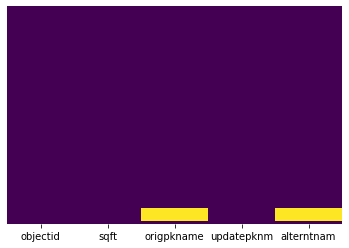

In [5]:
sns.heatmap(park1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# use heatmap to see what data I am missing

In [6]:
park1.dropna(inplace=True)
# dropping all NaN values 

In [7]:
park1 = park1[["sqft","updatepknm"]]
park1.rename(columns = {"updatepknm":"name"},inplace = True)

In [8]:
park1

,sqft,name
0,4.177537e+04,August Wilson Park
1,8.973835e+04,Young Field Park
2,2.041572e+04,Roland Lockridge Community Park
3,8.517818e+04,Friendship Park
4,2.225066e+05,Heth's Park
...,...,...
197,1.717911e+06,Fairhaven Park
198,3.494049e+06,Seldom Seen Park
199,1.450462e+06,Bigelow Park
213,6.072921e+06,Hazelwood Park


In [9]:
park2 = pd.read_csv("parks2.csv")
# need park data with neighborhood attached

In [10]:
park2.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [11]:
park2 = park2[["name","neighborhood"]]

In [12]:
parks = park1.merge(park2,how='outer',on= "name")
# merging the datasets on the park name 

<AxesSubplot:>

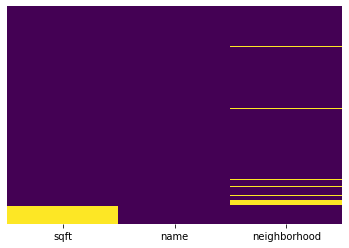

In [13]:
sns.heatmap(parks.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
parks.dropna(inplace=True)
# dropping all parks with missing values

In [15]:
parks = pd.DataFrame(parks.groupby(by='neighborhood')['sqft'].sum().sort_values(ascending = False))
# creating frame for aggregating sqft of parks per neighborhood

In [16]:
parks.head()

,sqft
neighborhood,
Squirrel Hill South,4.542749e+07
Highland Park,1.668423e+07
Perry North,1.133439e+07
Brookline,4.779746e+06
Beltzhoover,3.483008e+06


In [17]:
import geopandas
neighborhoods = geopandas.read_file("/Users/natemcdowell/Desktop/General/SchoolWork/year4/big_ideas/Data-Visualization/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#

In [18]:
park_map = neighborhoods.merge(parks, how='left', left_on='hood', right_on='neighborhood')

<AxesSubplot:>

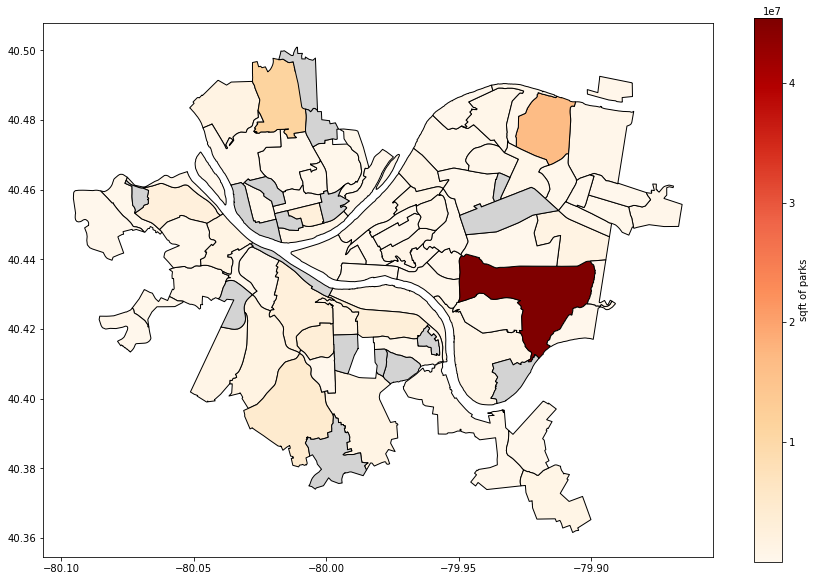

In [19]:
park_map.plot(column='sqft', # set the data to be used for coloring
       cmap='OrRd',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "sqft of parks"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

In [20]:
# this map shows the total sqft of parks per neighborhood

# Population

In [21]:
pop = pd.read_csv("population-density.csv")

In [22]:
pop.columns

Index(['Neighborhood', 'Sector #', 'Pop. 1940', 'Pop. 1950', 'Pop. 1960',
       'Pop. 1970', 'Pop. 1980', 'Pop. 1990', 'Pop. 2000', 'Pop. 2010',
       '% Pop. Change, 60-70', '% Pop. Change, 70-80', '% Pop. Change, 80-90',
       '% Pop. Change, 90-00', '% Pop. Change, 00-10',
       'Pop. as % of City total (2010)', 'Land Area (sq. mi)',
       'Land Area (acres)', 'Persons / sq. mi (2010)',
       'Persons / sq. mi (2000)', 'Persons / acre (2010)',
       'Persons / acre (2000)', '% African American (2010)', '% Asian (2010)',
       '% Other (2010)', '% White (2010)', '% 2+ Races (2010)',
       '% Hispanic (of any race) (2010)', '% Pop. Age < 5 (2010)',
       '% Pop. Age 5-19 (2010)', '% Pop. Age 20-34 (2010)',
       '% Pop. Age 35-59 (2010)', '% Pop. Age 60-74 (2010)',
       '% Pop. Age > 75 (2010)'],
      dtype='object')

In [23]:
pop = pop[['Neighborhood','Pop. 2010','Land Area (sq. mi)','Persons / sq. mi (2010)']]
pop.rename(columns = {"Pop. 2010":"pop","Land Area (sq. mi)":"sqmi","Persons / sq. mi (2010)":"person_sqmi"}, inplace = True)
pop.columns = pop.columns.str.lower()

In [24]:
pop.head()

,neighborhood,pop,sqmi,person_sqmi
0,Allegheny Center,933,0.2,"4,442.9"
1,Allegheny West,462,0.1,"3,276.6"
2,Allentown,"2,500",0.3,"8,474.6"
3,Arlington,"1,869",0.5,"3,976.6"
4,Arlington Heights,244,0.1,"1,848.5"


# Traffic/Road Data

In [25]:
cross = pd.read_csv("crosswalks.csv")

In [26]:
cross.head()

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267


In [27]:
total_walks = pd.DataFrame(cross.value_counts("neighborhood"))

<AxesSubplot:ylabel='neighborhood'>

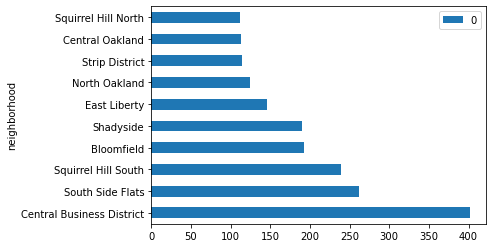

In [28]:
total_walks.head(10).plot(kind="barh")

In [29]:
signs = pd.read_csv("signage.csv")
# all marked intersections

In [30]:
signs.head()

,id,name,description,flash_time,flash_yellow,operation_type,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1233506574,TS1,Aiken Ave - Baum Blvd,24 Hr stop and go,NaN,Fully Actuated,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.456941,-79.938539
1,322808398,TS10,Alexander St - Steuben St,24 Hr stop and go,NaN,Semi Actuated,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.441993,-80.034544
2,1626189126,TS100,Beeler St - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.443890,-79.938799
3,2085487046,TS101,Beeler St - Wilkins Ave,00:00 - 06:00,NaN,Fixed,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445636,-79.931220
4,1187990770,TS102,Bellefield Ave - Fifth Ave,24 Hr stop and go,FIFTH AVE,Fixed,North Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-7,40.446484,-79.951914


In [31]:
total_signs = pd.DataFrame(signs.value_counts("neighborhood"))

<AxesSubplot:ylabel='neighborhood'>

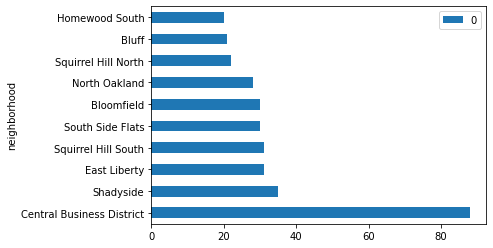

In [32]:
total_signs.head(10).plot(kind="barh")

In [33]:
#combine traffic data with population data

# Combining Data

In [34]:
frame = pop.merge(total_signs, on = "neighborhood")
frame = frame.merge(total_walks, on = "neighborhood")
frame =frame.merge(parks, on = "neighborhood")

In [35]:
frame.head()

,neighborhood,pop,sqmi,person_sqmi,0_x,0_y,sqft
0,Allegheny Center,933,0.2,"4,442.9",14,41,2.783957e+06
1,Allentown,"2,500",0.3,"8,474.6",4,24,1.433968e+06
2,Arlington,"1,869",0.5,"3,976.6",1,13,2.529969e+05
3,Banksville,"4,144",1.0,"4,276.6",6,16,8.368560e+05
4,Bedford Dwellings,"1,202",0.2,"6,715.1",1,8,3.520345e+05


In [36]:
frame = frame.rename(columns = {"0_x":"signs","0_y":"walks","sqft":"park_area"})

In [37]:
frame.dtypes

neighborhood     object
pop              object
sqmi            float64
person_sqmi      object
signs             int64
walks             int64
park_area       float64
dtype: object

In [38]:
frame["person_sqmi"]=frame["person_sqmi"].str.replace(",","").astype(float)
frame["pop"]=frame["pop"].str.replace(",","").astype(float)

In [39]:
display(frame.dtypes)
frame.head()

neighborhood     object
pop             float64
sqmi            float64
person_sqmi     float64
signs             int64
walks             int64
park_area       float64
dtype: object

,neighborhood,pop,sqmi,person_sqmi,signs,walks,park_area
0,Allegheny Center,933.0,0.2,4442.9,14,41,2.783957e+06
1,Allentown,2500.0,0.3,8474.6,4,24,1.433968e+06
2,Arlington,1869.0,0.5,3976.6,1,13,2.529969e+05
3,Banksville,4144.0,1.0,4276.6,6,16,8.368560e+05
4,Bedford Dwellings,1202.0,0.2,6715.1,1,8,3.520345e+05


In [40]:
frame["sign_walks"] = frame["signs"] + frame["walks"]
normal = frame.drop(columns = ["neighborhood"])


In [41]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(normal)
scaled = scaler.fit_transform(normal)
scaled_df = pd.DataFrame(scaled, columns=normal.columns)
scaled_df

,pop,sqmi,person_sqmi,signs,walks,park_area,sign_walks
0,0.045705,0.00,0.197469,0.149425,0.099751,0.061267,0.108607
1,0.151185,0.04,0.385414,0.034483,0.057357,0.031549,0.053279
2,0.108710,0.12,0.175731,0.000000,0.029925,0.005551,0.024590
3,0.261847,0.32,0.189716,0.057471,0.037406,0.018404,0.040984
4,0.063813,0.00,0.303391,0.000000,0.017456,0.007731,0.014344
...,...,...,...,...,...,...,...
62,0.162561,0.08,0.297564,0.091954,0.082294,0.002861,0.084016
63,0.000000,0.00,0.049558,0.068966,0.057357,0.002318,0.059426
64,0.158185,0.00,0.554959,0.068966,0.099751,0.000033,0.094262
65,0.189284,0.20,0.196895,0.022989,0.024938,0.003458,0.024590


In [42]:
scaled_df["neighborhood"] = frame["neighborhood"]

In [43]:
scaled_df.head()

,pop,sqmi,person_sqmi,signs,walks,park_area,sign_walks,neighborhood
0,0.045705,0.00,0.197469,0.149425,0.099751,0.061267,0.108607,Allegheny Center
1,0.151185,0.04,0.385414,0.034483,0.057357,0.031549,0.053279,Allentown
2,0.108710,0.12,0.175731,0.000000,0.029925,0.005551,0.024590,Arlington
3,0.261847,0.32,0.189716,0.057471,0.037406,0.018404,0.040984,Banksville
4,0.063813,0.00,0.303391,0.000000,0.017456,0.007731,0.014344,Bedford Dwellings


In [44]:
frame = scaled_df

In [45]:
mapping = neighborhoods.merge(frame, how='left', left_on='hood', right_on='neighborhood')

<AxesSubplot:>

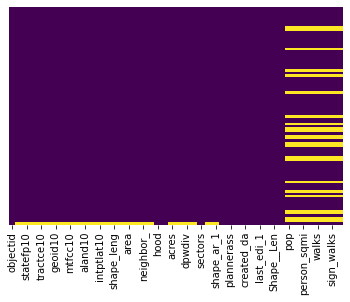

In [46]:
sns.heatmap(mapping.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
mapping = mapping.dropna()

<AxesSubplot:>

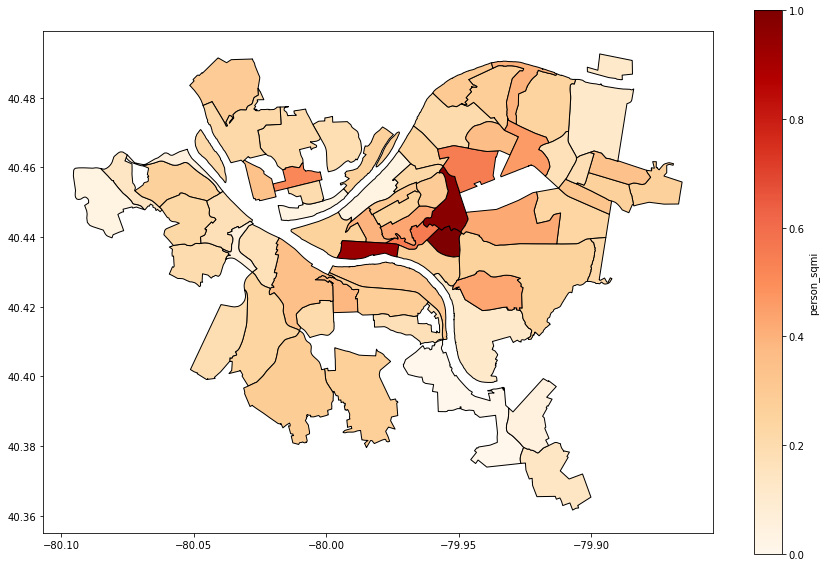

In [48]:
mapping.plot(column='person_sqmi', # set the data to be used for coloring
       cmap='OrRd',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "person_sqmi"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

<AxesSubplot:>

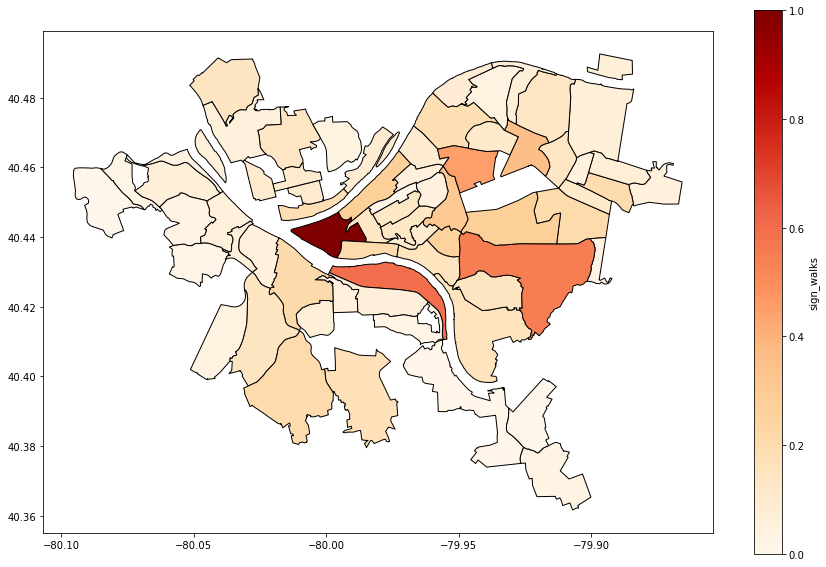

In [49]:
mapping.plot(column='sign_walks', # set the data to be used for coloring
       cmap='OrRd',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "sign_walks"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )

In [50]:
temp = mapping
temp["sign_walks"] = -temp["sign_walks"]

<AxesSubplot:>

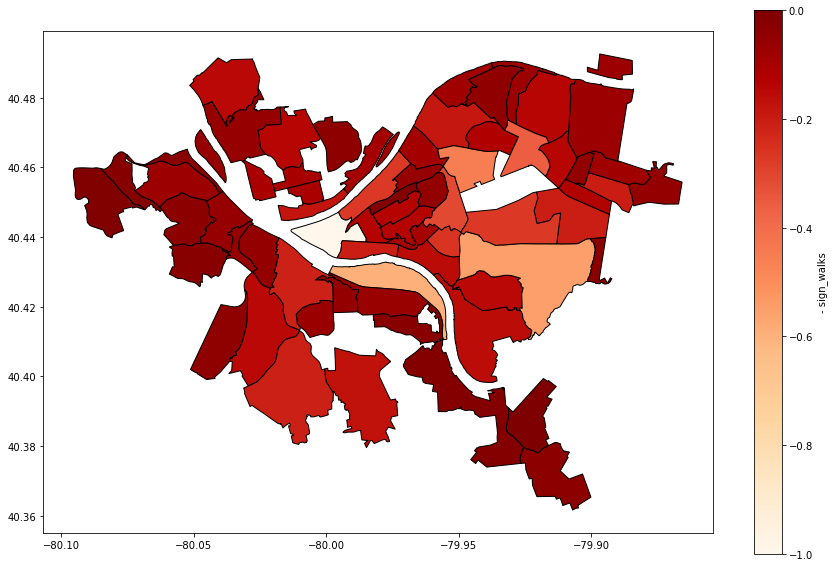

In [52]:
temp.plot(column=('sign_walks'), # set the data to be used for coloring
       cmap='OrRd',              # choose a color palette
       edgecolor="black",        # outline the districts in white
       legend=True,              # show the legend
       legend_kwds={'label': "- sign_walks"},
       figsize=(15, 10),         # set the size
       missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       )